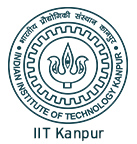

**CS724: Sensing, Communication and Networking for Smart Wireless Devices**

# ASSIGNMENT 1

      Name: Krishna Kumar Bais

      Roll no: 241110038


# Question - 1

**(1)** Both vectors are linearly independent. Thus, the column space of matrix 𝐴 is 2D.

**(2)** Both column vectors are linearly dependent, one of them can be expressed as a multiple of the other. Thus, the column space of matrix 𝐵 is 1D.

**(3)** There are only two Linearly Independent Column vectors , we can obtain column_vector_2 from column_vector1, since one can be  expressed as a multiple of the other. Thus, the column space of matrix D is 2D.


# Question - 2

 **Importing libraries for data analysis and visualization:**

   1)numpy (np) for numerical operations and array handling

   2)pandas (pd) for data manipulation and analysis with DataFrames

   3)matplotlib.pyplot (mplt) for creating various types of plots and charts

In [66]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as mplt

**Question 2a**

function calculate_dist is used to calculate distance between user and satellite. Based on this distance,function then calculate time it takes for a signal to reach from satellite to user, with the result  displayed in ns respectively.

In [70]:
#fix  user at (100,100,100)
user = [100,100,100]
#random Location of five satellites s1,s2,s3,s4,s5
s1 = [106,120,220]
s2 = [52,21,147]
s3 = [61,358,124]
s4 = [97,133,115]
s5 = [25,403,106]
#s is speed of the light in m/s
s = 3*10**8

In [69]:
#Function calculate_dist() to calculate distance between user and satellite
def calculate_dist(s):
    a1 = (100 - s[0])**2
    a2 = (100 - s[1])**2
    a3 = (100 - s[2])**2
    a = (a1+a2+a3)**(0.5)
    return a

In [71]:
# d1,d2, d3,d4 ,d5 are distance between user & satellites s1,s2,s3,s4,s5
d1 = calculate_dist(s1)
d2 = calculate_dist(s2)
d3 = calculate_dist(s3)
d4 = calculate_dist(s4)
d5 = calculate_dist(s5)
print("Distance between user and s1 ,s2,s3 ,s4 ,s5 respectively are:\n ",d1,d2,d3,d4,d5)

Distance between user and s1 ,s2,s3 ,s4 ,s5 respectively are:
  121.8031198286809 103.70149468546728 262.0324407396916 36.373066958946424 312.20185777794467


In [72]:
# t1 ,t2 , t3 , t4,t5 indicate time taken for a signal to reach from each of satellites to user.
# time is displayed in ns
ns = 10 ** 9
t1 = d1 / s
t2 = d2 / s
t3 = d3 / s
t4 = d4 / s
t5 = d5 / s
print("Time taken for a signal to arrive from s1,s2,s3,s4,s5 to user respectively are :\n",t1*ns,"ns ",t2*ns,"ns ",t3*ns,"ns ",t4*ns,"ns ",t5*ns,"ns ")


Time taken for a signal to arrive from s1,s2,s3,s4,s5 to user respectively are :
 406.01039942893635 ns  345.6716489515576 ns  873.4414691323053 ns  121.24355652982142 ns  1040.6728592598154 ns 


**Question 2b**

Now we do the opposite operation,  using the satellite locations and the times to find the location of the user and check whether the location of the user is coming exactly as (100,100,100). Computing  X as inverse(M_transpose * M) * (M_transpose * N).

In [73]:
#satellites are s1,s2,s3 ,s4,s5
matrix_a1 = [[2 *(s2[0] -s1[0]), 2 * (s2[1] -s1[1]), 2 * (s2[2]- s1[2])],
              [2* (s3[0]-s2[0]), 2 * (s3[1] -s2[1]), 2* (s3[2] - s2[2])],
              [2 *(s4[0] -s3[0]), 2 *(s4[1] -s3[1]),2 * (s4[2] - s3[2])],
              [2 * (s5[0] -s4[0]),2 *(s5[1] -s4[1]), 2 * (s5[2] -s4[2])]]
M = np.array(matrix_a1)

matrix_a2 = [[(d1**2- d2**2)-(s1[0]**2 - s2[0]**2)- (s1[1]**2 - s2[1]**2) -(s1[2]**2- s2[2]**2)],
            [(d2**2 - d3**2) -(s2[0]**2- s3[0]**2) -(s2[1]**2- s3[1]**2)- (s2[2]**2 -s3[2]**2)],
              [(d3**2 - d4**2)-(s3[0]**2 -s4[0]**2)-(s3[1]**2 -s4[1]**2) -(s3[2]**2 - s4[2]**2)],
              [(d4**2 -d5**2)-(s4[0]**2 -s5[0]**2) -(s4[1]**2 -s5[1]**2) -(s4[2]**2 - s5[2]**2)]]
N = np.array(matrix_a2)

# A = inverse(M_transpose * M) * (M_transpose * N)
M_transpose = M.transpose()
B = np.matmul(M_transpose , M)
B_inverse = np.linalg.inv(B)
W = np.matmul(M_transpose , N)
A = np.matmul(B_inverse , W)
print("Location of the user: ")
print(A)

Location of the user: 
[[100.]
 [100.]
 [100.]]


 **Question 2c**

we are adding some random errors with the time and determining the corresponding location inaccuracy. The location inaccuracy is determined as the distance between the user's location after adding some random erros with the time and the user's fixed loaction (100,100,100).

In [74]:
#t1 ,t2 ,t3, t4, t5 indicate time taken for a signal to reach from each of satellites to user.
# adding some random errors to the time in terms of (-1 to +1)ns
rand_error = np.random.randint(-1,1,1)[0]
t1 = t1*ns + rand_error
t2 = t2*ns + rand_error
t3 = t3*ns + rand_error
t4 = t4*ns + rand_error
t5 = t5*ns + rand_error

#calucating the distance in meteres between the user and satellite considering the random errors added to the time
d1 = s * t1/ns
d2 = s * t2/ns
d3 = s * t3/ns
d4 = s * t4/ns
d5 = s * t5/ns

# update matrix_a2
updated_matrix_a21 =[[(d1**2 - d2**2)-(s1[0]**2-s2[0]**2)-(s1[1]**2-s2[1]**2)-(s1[2]**2 -s2[2]**2)],
           [(d2**2 -d3**2)-(s2[0]**2 - s3[0]**2)-(s2[1]**2 - s3[1]**2)-(s2[2]**2 - s3[2]**2)],
           [(d3**2 - d4**2)-(s3[0]**2 - s4[0]**2)-(s3[1]**2 -s4[1]**2)-(s3[2]**2 -s4[2]**2)],
           [(d4**2 -d5**2)-(s4[0]**2 -s5[0]**2)-(s4[1]**2 -s5[1]**2)-(s4[2]**2 - s5[2]**2)]]

new_a21 =np.array(updated_matrix_a21)
W1 = np.matmul(M_transpose , new_a21)

A1 = np.matmul(B_inverse , W1)
print("New Location of the user: ")
print(A1)
p1 = calculate_dist(A1)
print("location Inaccuracy: ", p1)


New Location of the user: 
[[ 99.42816862]
 [100.17585302]
 [100.27457071]]
location Inaccuracy:  [0.65825868]


**Question 2d**

 we are increasing amount of random errors with time, and checking the effect of this change on the localization error. Thereby also plotting a graph on the amount of error in time vs localization error to check the impact.

In [76]:
# t1 , t2 , t3 , t4, t5 indicate the taken for a signal to reach from each of satellites to user.
# adding increasing random errors to the time in terms of ns
j = 0
time_error = []
location_error = []

i = 0
while i < 30:
    location_err = []
    time_err = []
    k = 0
    while k < 3:
        random_error = np.random.randint(j, j+5, 1)[0]
        time_err.append(random_error)
        t21 = t1*ns + random_error
        t22 = t2*ns + random_error
        t23 = t3*ns + random_error
        t24 = t4*ns + random_error
        t25 = t5*ns + random_error

    #calucating distance in meteres between user and satellite considering random errors added to the time
        d21 = s * t21/ns
        d22 = s * t22/ns
        d23 = s * t23/ns
        d24 = s * t24/ns
        d25 = s * t25/ns

    # update matrix_a2
        updated_matrix_a22 =[[(d21**2-d22**2)-(s1[0]**2 - s2[0]**2)-(s1[1]**2 - s2[1]**2)-(s1[2]**2 - s2[2]**2)],
                         [(d22**2-d23**2)-(s2[0]**2 -s3[0]**2)-(s2[1]**2- s3[1]**2)-(s2[2]**2 - s3[2]**2)],
                         [(d23**2-d24**2)-(s3[0]**2 - s4[0]**2)-(s3[1]**2 -s4[1]**2)-(s3[2]**2 -s4[2]**2)],
                         [(d24**2-d25**2)-(s4[0]**2 -s5[0]**2)-(s4[1]**2 - s5[1]**2)-(s4[2]**2- s5[2]**2)]]

        new_a22 = np.array(updated_matrix_a22)
        W2 = np.matmul(M_transpose , new_a22)
        A2 = np.matmul(B_inverse , W2)
        #print("New Location of user: ")
        #print(A2)
        p2 = calculate_dist(A2)
        location_err.append(p2[0])
        k=k+1
    avg_location_error = sum(location_err)/len(location_err)
    avg_time_error = sum(time_err)/len(time_err)
    location_error.append(avg_location_error)
    time_error.append(avg_time_error)
    j=j+5
    i=i+1

print(time_error)
print(location_error)


[1.0, 6.666666666666667, 12.0, 16.333333333333332, 21.333333333333332, 26.666666666666668, 31.666666666666668, 38.0, 41.666666666666664, 48.0, 53.333333333333336, 57.333333333333336, 61.0, 69.0, 72.66666666666667, 76.66666666666667, 80.33333333333333, 87.33333333333333, 92.33333333333333, 96.33333333333333, 102.0, 107.0, 111.66666666666667, 117.33333333333333, 121.0, 126.33333333333333, 132.33333333333334, 135.66666666666666, 141.0, 146.66666666666666]
[3.2995521341143155e+20, 3.2995521341514193e+20, 3.2995521341863415e+20, 3.2995521342147166e+20, 3.299552134247456e+20, 3.2995521342823753e+20, 3.299552134315115e+20, 3.2995521343565824e+20, 3.299552134380593e+20, 3.299552134422061e+20, 3.299552134456982e+20, 3.299552134483175e+20, 3.2995521345071835e+20, 3.299552134559565e+20, 3.299552134583573e+20, 3.2995521346097657e+20, 3.299552134633772e+20, 3.299552134679607e+20, 3.299552134712346e+20, 3.2995521347385354e+20, 3.2995521347756386e+20, 3.2995521348083804e+20, 3.2995521348389365e+20, 3

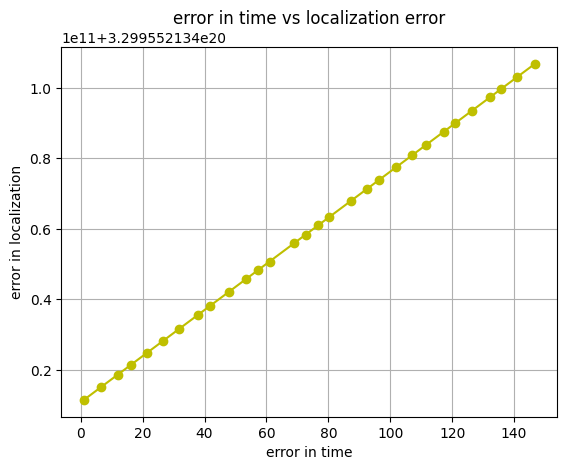

In [78]:
mplt.plot(time_error, location_error,marker='o',color='y')
mplt.title('error in time vs localization error')
mplt.xlabel('error in time')
mplt.ylabel('error in localization')
mplt.grid()
mplt.show()

**From the above figure of error in time vs localization error it can inferred** **that on increasing the amount of random errors with time the** **corresponding average localization error also increases.**